# Extract Basin Centroids

This notebook extracts centroid coordinates from basin geometry files and saves them for later use in forecast data processing.

## Overview

The process consists of the following steps:
1. Load basin boundary geometries from shapefiles in a directory
2. Calculate centroid coordinates for each basin
3. Save the basin centroids to a CSV file

In [1]:
# Import required libraries
import os
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Import functions from neuralhydrology datautils module
from neuralhydrology.datautils.extract_basin_centroids import (
    load_basin_boundaries,
    calculate_basin_centroids,
    plot_basins_and_centroids
)

# Suppress warnings
warnings.filterwarnings('ignore')

## Define File Paths

In [2]:
# Define paths for input and output data
basin_dir_path = "../../data/harz/basin_shapefiles"  # Directory containing basin boundary shapefiles
output_dir = "../../data/harz/basin_centroids"
output_file = os.path.join(output_dir, "basin_centroids.csv")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

print(f"Basin directory path: {basin_dir_path}")
print(f"Output will be saved to: {output_file}")

Basin directory path: ../../data/harz/basin_shapefiles
Output will be saved to: ../../data/harz/basin_centroids/basin_centroids.csv


## Load Basin Geometries

,LABEL,geometry,basin_name,catch_name,name_catch,layer,path
0,1,"POLYGON ((10.29069 51.9046, 10.29069 51.90458,...",innerste_reservoir_catchment_Basin_0,NaN,NaN,NaN,NaN
1,1,"POLYGON ((10.45931 51.85123, 10.47153 51.84978...",oker_reservoir_catchment_Basin_0,NaN,NaN,NaN,NaN
2,1,"POLYGON ((10.58208 51.84431, 10.58347 51.84431...",ecker_reservoir_catchment_Basin_0,Ecker,Ecker,NaN,NaN
3,1,"POLYGON ((10.30806 51.74208, 10.30792 51.74208...",soese_reservoir_catchment_Basin_0,NaN,NaN,NaN,NaN
4,1,"POLYGON ((10.37486 51.91246, 10.37653 51.91245...",grane_reservoir_catchment_Basin_0,NaN,NaN,catchment,Y:/Aktenplan/2 Projekte/2.065_PROWAVE/06 Proje...


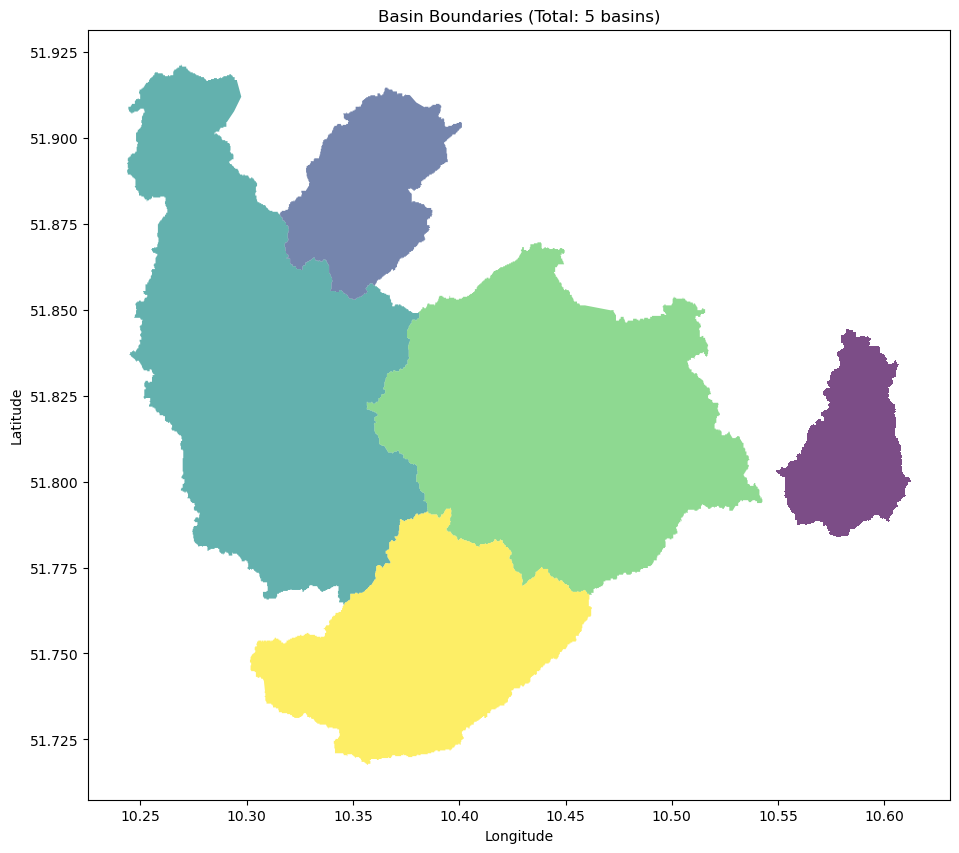

In [3]:
# Load basin boundary data from all shapefiles in the directory
basins = load_basin_boundaries(basin_dir_path)

# Display the first few rows of the basin data
if basins is not None:
    display(basins.head())
    # Plot the basins to verify they loaded correctly
    fig, ax = plt.subplots(figsize=(12, 10))
    basins.plot(ax=ax, column='basin_name', legend=False, alpha=0.7, cmap='viridis')
    plt.title(f"Basin Boundaries (Total: {len(basins)} basins)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

## Calculate Basin Centroids

Calculated centroids for 5 basins


,basin_name,latitude,longitude
0,innerste_reservoir_catchment_Basin_0,51.834451,10.307828
1,oker_reservoir_catchment_Basin_0,51.816468,10.447276
2,ecker_reservoir_catchment_Basin_0,51.810056,10.584058
3,soese_reservoir_catchment_Basin_0,51.752310,10.383225
4,grane_reservoir_catchment_Basin_0,51.884391,10.357203


                             basin_name   latitude  longitude
0  innerste_reservoir_catchment_Basin_0  51.834451  10.307828
1      oker_reservoir_catchment_Basin_0  51.816468  10.447276
2     ecker_reservoir_catchment_Basin_0  51.810056  10.584058
3     soese_reservoir_catchment_Basin_0  51.752310  10.383225
4     grane_reservoir_catchment_Basin_0  51.884391  10.357203


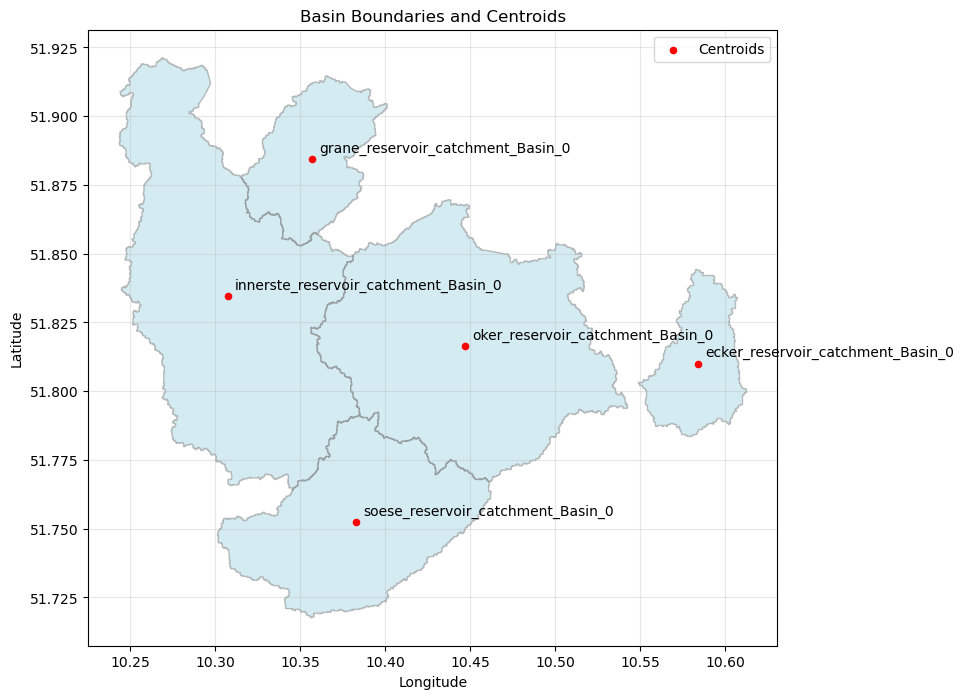

In [4]:
# Calculate basin centroids
centroids = calculate_basin_centroids(basins)

if centroids is not None:
    # Display the centroid data
    print(f"Calculated centroids for {len(centroids)} basins")
    display(centroids.head())
    
    # Plot basins and centroids
    plot_basins_and_centroids(basins, centroids)
else:
    print("No centroids could be calculated.")

## Save Centroids to CSV File

In [5]:
# The centroids DataFrame already has the correct column names (latitude, longitude)
# No need to rename columns since calculate_basin_centroids returns them correctly

if centroids is not None:
    # Save the basin centroids to CSV
    centroids.to_csv(output_file, index=False)
    print(f"Saved {len(centroids)} basin centroids to {output_file}")
    
    # Display the first few rows of the saved data
    display(centroids.head())
else:
    print("No centroids data to save.")

Saved 5 basin centroids to ../../data/harz/basin_centroids/basin_centroids.csv


,basin_name,latitude,longitude
0,innerste_reservoir_catchment_Basin_0,51.834451,10.307828
1,oker_reservoir_catchment_Basin_0,51.816468,10.447276
2,ecker_reservoir_catchment_Basin_0,51.810056,10.584058
3,soese_reservoir_catchment_Basin_0,51.752310,10.383225
4,grane_reservoir_catchment_Basin_0,51.884391,10.357203


## Conclusion

This notebook has:
1. Loaded basin boundary geometries from shapefiles in a directory
2. Calculated centroid coordinates for each basin
3. Saved the basin centroids to a CSV file

The output file `basin_centroids.csv` contains the basin names and their centroid coordinates (latitude, longitude) which can be used for further processing.